C:\Users\Sanam\AppData\Local\Temp\ipykernel_18792\3814514866.py:6: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Divar.csv')
C:\Users\Sanam\AppData\Local\Temp\ipykernel_18792\3814514866.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat2_counts.values, y=cat2_counts.index, palette='viridis')


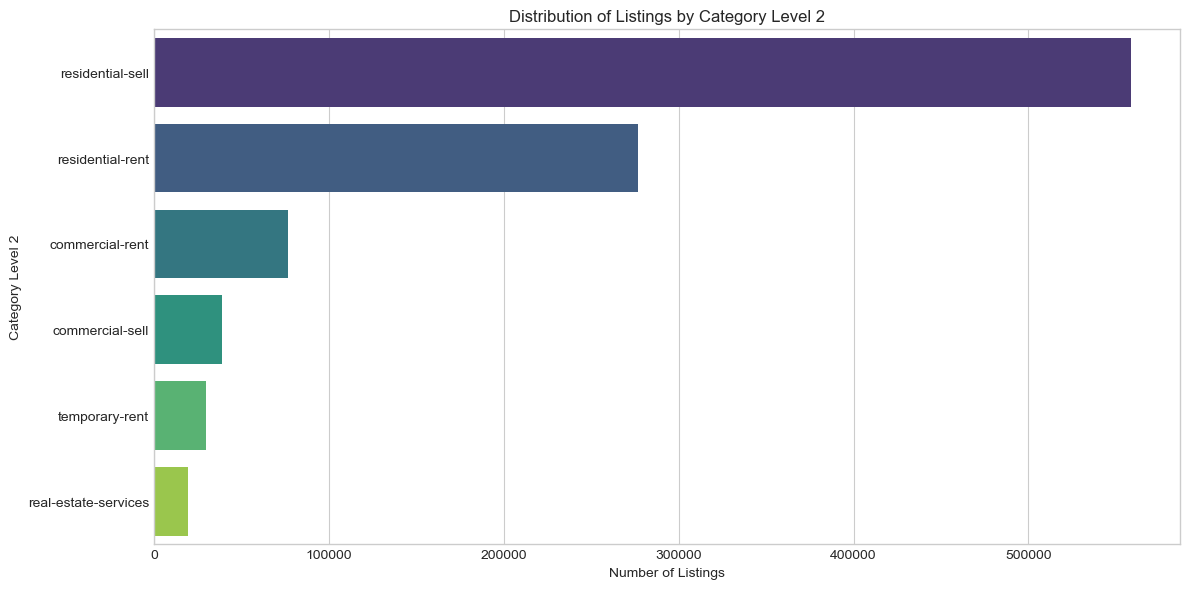

C:\Users\Sanam\AppData\Local\Temp\ipykernel_18792\3814514866.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat3_counts.values, y=cat3_counts.index, palette='magma')


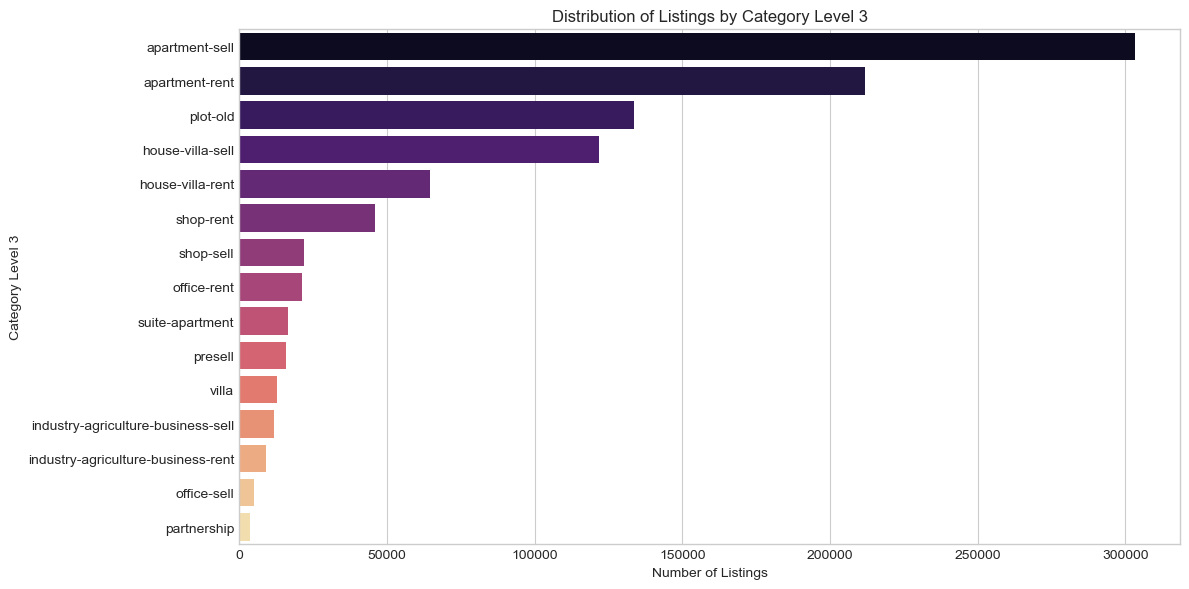

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Divar.csv')

# --- Category Level 2 ---
plt.figure(figsize=(12, 6))
cat2_counts = df['cat2_slug'].value_counts().head(15)  # Show top 15 categories
sns.barplot(x=cat2_counts.values, y=cat2_counts.index, palette='viridis')
plt.title('Distribution of Listings by Category Level 2')
plt.xlabel('Number of Listings')
plt.ylabel('Category Level 2')
plt.tight_layout()
plt.show()

# --- Category Level 3 ---
plt.figure(figsize=(12, 6))
cat3_counts = df['cat3_slug'].value_counts().head(15)  # Show top 15 categories
sns.barplot(x=cat3_counts.values, y=cat3_counts.index, palette='magma')
plt.title('Distribution of Listings by Category Level 3')
plt.xlabel('Number of Listings')
plt.ylabel('Category Level 3')
plt.tight_layout()
plt.show()


In [8]:
print(df.columns)


Index(['Unnamed: 0', 'cat2_slug', 'cat3_slug', 'city_slug',
       'neighborhood_slug', 'created_at_month', 'user_type', 'description',
       'title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',
       'land_size', 'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony',
       'has_elevator', 'has_warehouse', 'has_parking', 'construction_year',
       'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
       'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'regular_person_capacity',

In [9]:
print("Most frequent values in construction_year:")
print(df['construction_year'].value_counts(dropna=False).head(20))


Most frequent values in construction_year:
construction_year
NaN            184172
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
Name: count, dtype: int64


C:\Users\Sanam\AppData\Local\Temp\ipykernel_18792\1338985920.py:7: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Divar.csv')


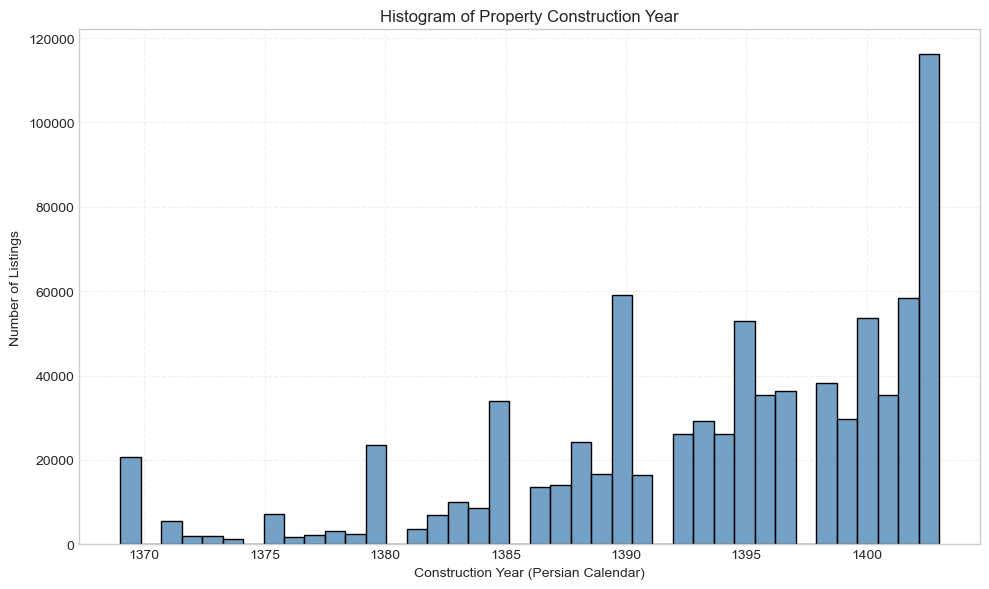

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data
df = pd.read_csv('Divar.csv')

# Function: convert Persian digits to English
def fa_to_en(text):
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    table = str.maketrans(''.join(persian_digits), ''.join(english_digits))
    return str(text).translate(table)

# Function: extract valid year from strings
def extract_year(val):
    val = fa_to_en(str(val)).strip()
    if 'قبل' in val:
        return 1369
    match = re.search(r'13\d{2}|14\d{2}', val)
    if match:
        year = int(match.group())
        if 1300 <= year <= 1500:
            return year
    return None

# Apply cleaning
df['clean_year'] = df['construction_year'].apply(extract_year)
years = df['clean_year'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(years, bins=40, kde=False, color='steelblue')
plt.title('Histogram of Property Construction Year')
plt.xlabel('Construction Year (Persian Calendar)')
plt.ylabel('Number of Listings')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\Sanam\AppData\Local\Temp\ipykernel_18792\4082220069.py:46: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar = pd.read_csv(DIVAR_PATH)


Label-based mapping — Megacity count: 0
Fallback list mapping — Megacity count: 8
Matched rows: 891,453 | Megacity n=420,678 | Small n=470,775

Group summary (m²):
      group       n  mean_m2  std_m2  median_m2
0  Megacity  420678   133.94  131.26      100.0
1     Small  470775   155.43  154.00      105.0

Welch t-test: t=-71.085, p=0.000000
Hedges' g: -0.149
Result: Significant — mean area in megacities is LOWER than in small towns/villages.


<Figure size 700x600 with 0 Axes>

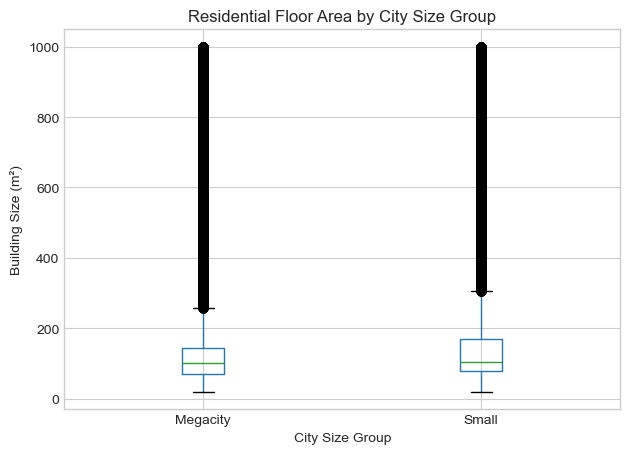

In [11]:
# === Hypothesis: Are homes smaller in megacities than in small towns/villages? ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import re

DIVAR_PATH = "Divar.csv"
CITY_CLASS_PATH = "iran_city_classification.csv"

# ---------- helpers ----------
def fa_to_en(text):
    if pd.isna(text): return text
    table = str.maketrans("۰۱۲۳۴۵۶۷۸۹٠١٢٣٤٥٦٧٨٩", "0123456789"*2)
    return str(text).translate(table)

def normalize_city(text):
    if pd.isna(text): return text
    t = fa_to_en(str(text)).strip().lower()
    t = (t.replace('ي','ی').replace('ك','ک')
           .replace('-', ' ').replace('_',' ').replace('‌',' '))
    t = re.sub(r'\s+', ' ', t).strip()
    for pref in ('استان ','شهرستان ','شهر '):
        if t.startswith(pref): t = t[len(pref):]
    return t

def to_numeric_clean(x):
    if pd.isna(x): return np.nan
    s = fa_to_en(str(x))
    s = re.sub(r'[^0-9\.]', '', s)
    return float(s) if s else np.nan

def find_col(cols, priorities, substrings=()):
    low = [c.lower() for c in cols]
    for p in priorities:
        if p.lower() in low:
            return cols[low.index(p.lower())]
    for sub in substrings:
        for i,c in enumerate(low):
            if sub.lower() in c:
                return cols[i]
    return None

# ---------- load ----------
divar = pd.read_csv(DIVAR_PATH)
cityc = pd.read_csv(CITY_CLASS_PATH)

# ---------- pick columns robustly ----------
DIVAR_CITY_COL = find_col(divar.columns, ["city_slug","city","city_name","شهر"], ("city","شهر"))
DIVAR_SIZE_COL = find_col(divar.columns, ["building_size","area","size","زیربنا","مساحت"], ("size","area","بنا","مساحت"))
if DIVAR_CITY_COL is None or DIVAR_SIZE_COL is None:
    raise ValueError(f"Missing needed columns in Divar.csv. Got: {divar.columns.tolist()}")

CLASS_CITY_COL = find_col(cityc.columns, ["city_slug","city","city_name","name","شهر"], ("city","name","شهر"))
POP_COL = find_col(cityc.columns, ["population","pop","جمعیت"], ("pop","جمع","population"))
LABEL_COL = find_col(cityc.columns, ["class","group","category","size","tier","type","level","رده","گروه","دسته"], ("class","group","category","size","tier","type","level","رده","گروه","دسته"))
MEGA_FLAG_COL = find_col(cityc.columns, ["is_megacity","megacity","is_mega","کلانشهر"], ("mega","کلان"))

if CLASS_CITY_COL is None:
    raise ValueError(f"Missing city column in classification file. Got: {cityc.columns.tolist()}")

# ---------- normalize names ----------
divar["city_clean"] = divar[DIVAR_CITY_COL].apply(normalize_city)
cityc["city_clean"] = cityc[CLASS_CITY_COL].apply(normalize_city)

# ---------- STEP A: population-based ----------
size_group = pd.Series(index=cityc.index, dtype=object)
if POP_COL is not None:
    cityc[POP_COL] = pd.to_numeric(cityc[POP_COL].apply(fa_to_en), errors="coerce")
    size_group = np.where(cityc[POP_COL] >= 1_000_000, "Megacity", "Small")
    print("Population-based mapping — Megacity count:", (size_group=="Megacity").sum())

# ---------- STEP B: label/flag-based (if needed) ----------
if (size_group=="Megacity").sum() == 0:
    if MEGA_FLAG_COL is not None:
        s = cityc[MEGA_FLAG_COL].astype(str).str.lower()
        size_group = np.where(s.isin({"1","true","yes","y","megacity","کلانشهر"}), "Megacity", "Small")
        print("Flag-based mapping — Megacity count:", (size_group=="Megacity").sum())
    elif LABEL_COL is not None:
        lbl = cityc[LABEL_COL].astype(str).str.lower()
        mega_kw = {"megacity","metropolis","metropolitan","کلانشهر","کلان شهر"}
        def map_lbl(x):
            for k in mega_kw:
                if k in x: return "Megacity"
            return "Small"
        size_group = lbl.apply(map_lbl)
        print("Label-based mapping — Megacity count:", (size_group=="Megacity").sum())

# ---------- STEP C: hard fallback with known Iranian megacities ----------
if (size_group=="Megacity").sum() == 0:
    known_megacities = {
        # Persian
        "تهران","مشهد","اصفهان","کرج","شیراز","تبریز","قم","اهواز",
        # Latin (slugs)
        "tehran","mashhad","isfahan","karaj","shiraz","tabriz","qom","ahvaz"
    }
    size_group = np.where(cityc["city_clean"].isin({normalize_city(x) for x in known_megacities}),
                          "Megacity","Small")
    print("Fallback list mapping — Megacity count:", (size_group=="Megacity").sum())

cityc["size_group"] = size_group
cityc = cityc[["city_clean","size_group"]]

# ---------- merge & clean ----------
df = divar.merge(cityc, on="city_clean", how="inner")
df["building_size_clean"] = df[DIVAR_SIZE_COL].apply(to_numeric_clean)
df = df[df["building_size_clean"].between(20, 1000)]

meg = df.loc[df["size_group"]=="Megacity","building_size_clean"].dropna()
sml = df.loc[df["size_group"]=="Small","building_size_clean"].dropna()

print(f"Matched rows: {len(df):,} | Megacity n={len(meg):,} | Small n={len(sml):,}")
if len(meg)==0 or len(sml)==0:
    raise ValueError("Still missing one group after mapping. Check city names inside your classification file.")

# ---------- Welch t-test ----------
t_stat, p_val = stats.ttest_ind(meg, sml, equal_var=False, nan_policy="omit")

def hedges_g(a, b):
    a, b = np.asarray(a), np.asarray(b)
    na, nb = len(a), len(b)
    sa, sb = np.var(a, ddof=1), np.var(b, ddof=1)
    s_pooled = np.sqrt(((na-1)*sa + (nb-1)*sb) / (na+nb-2))
    if s_pooled == 0: return np.nan
    d = (np.mean(a) - np.mean(b)) / s_pooled
    J = 1 - (3 / (4*(na+nb) - 9))
    return d * J

g = hedges_g(meg, sml)

summary = pd.DataFrame({
    "group": ["Megacity","Small"],
    "n": [len(meg), len(sml)],
    "mean_m2": [meg.mean(), sml.mean()],
    "std_m2": [meg.std(ddof=1), sml.std(ddof=1)],
    "median_m2": [np.median(meg), np.median(sml)]
}).round(2)

print("\nGroup summary (m²):")
print(summary)
print(f"\nWelch t-test: t={t_stat:.3f}, p={p_val:.6f}")
print(f"Hedges' g: {g:.3f}")
if p_val < 0.05:
    direction = "LOWER" if summary.loc[0,"mean_m2"] < summary.loc[1,"mean_m2"] else "HIGHER"
    print(f"Result: Significant — mean area in megacities is {direction} than in small towns/villages.")
else:
    print("Result: Not significant at α=0.05.")

# ---------- plot ----------
plt.figure(figsize=(7,6))
df[["size_group","building_size_clean"]].dropna().boxplot(by="size_group", column="building_size_clean")
plt.title("Residential Floor Area by City Size Group")
plt.suptitle("")
plt.xlabel("City Size Group")
plt.ylabel("Building Size (m²)")
plt.tight_layout()
plt.show()
